In [7]:
import pandas as pd

base = pd.read_csv("results/elastic_net/embeddings_30_pcs.csv")
tissue = pd.read_csv("results/elastic_net/embeddings_30_pcs_tissue.csv")
growth = pd.read_csv("results/elastic_net/embeddings_30_pcs_growth_rate.csv")
full = pd.read_csv("results/elastic_net/embeddings_30_pcs_tissue_growth_rate.csv")

print(base.shape, tissue.shape, full.shape)


(697, 8) (697, 8) (697, 8)


In [8]:
# Rename to avoid column overlap
base = base.rename(columns={"r2_mean": "R2_base"})
tissue = tissue.rename(columns={"r2_mean": "R2_tissue"})
growth = growth.rename(columns={"r2_mean": "R2_growth"})
full = full.rename(columns={"r2_mean": "R2_full"})

# Merge all results on DRUG_ID

merged = base[["DRUG_ID", "R2_base"]].merge(
    tissue[["DRUG_ID", "R2_tissue"]], on="DRUG_ID"
).merge(
    growth[["DRUG_ID", "R2_growth"]], on="DRUG_ID"
).merge(
    full[["DRUG_ID", "R2_full"]], on="DRUG_ID"
)


print(f"✅ Merged shape: {merged.shape}")
merged.head()


✅ Merged shape: (697, 5)


,DRUG_ID,R2_base,R2_tissue,R2_growth,R2_full
0,1,0.041938,0.057550,0.041400,0.041400
1,3,0.019782,0.019782,-0.036547,-0.036547
2,5,0.105449,0.105449,0.187338,0.187338
3,6,-0.048908,-0.048908,-0.054541,-0.054541
4,9,0.053293,0.053293,0.073465,0.073465


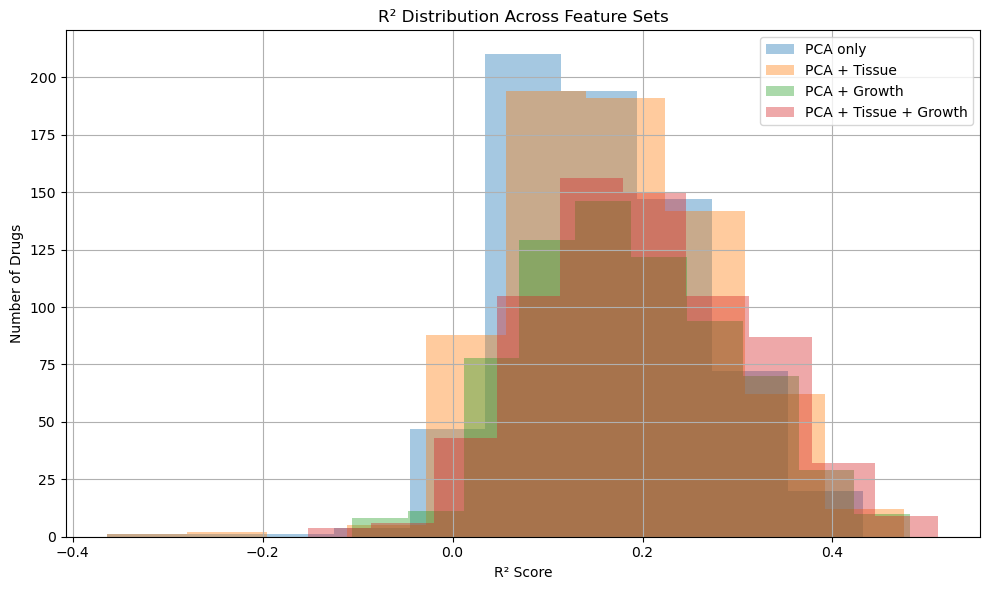

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged["R2_base"], alpha=0.4, label="PCA only")
plt.hist(merged["R2_tissue"], alpha=0.4, label="PCA + Tissue")
plt.hist(merged["R2_growth"], alpha=0.4, label="PCA + Growth")
plt.hist(merged["R2_full"], alpha=0.4, label="PCA + Tissue + Growth")
plt.xlabel("R² Score")
plt.ylabel("Number of Drugs")
plt.title("R² Distribution Across Feature Sets")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
mean_r2 = merged[["R2_base", "R2_tissue", "R2_growth", "R2_full"]].mean()
print("📊 Mean R² per model:")
print(mean_r2.sort_values(ascending=False))


📊 Mean R² per model:
R2_full      0.201276
R2_growth    0.186860
R2_tissue    0.171172
R2_base      0.154545
dtype: float64


In [11]:
# Compute deltas
merged["Δ_tissue"] = merged["R2_tissue"] - merged["R2_base"]
merged["Δ_growth"] = merged["R2_growth"] - merged["R2_base"]
merged["Δ_full"] = merged["R2_full"] - merged["R2_base"]

# Summary
print("📈 Elastic Net: PCA → PCA + Tissue")
print(f"Improved: {(merged['Δ_tissue'] > 0).sum()}")
print(f"Worsened: {(merged['Δ_tissue'] < 0).sum()}")
print(f"Mean ΔR²: {merged['Δ_tissue'].mean():.4f}")

print("\n📈 Elastic Net: PCA → PCA + Growth")
print(f"Improved: {(merged['Δ_growth'] > 0).sum()}")
print(f"Worsened: {(merged['Δ_growth'] < 0).sum()}")
print(f"Mean ΔR²: {merged['Δ_growth'].mean():.4f}")

print("\n📈 Elastic Net: PCA → PCA + Tissue + Growth")
print(f"Improved: {(merged['Δ_full'] > 0).sum()}")
print(f"Worsened: {(merged['Δ_full'] < 0).sum()}")
print(f"Mean ΔR²: {merged['Δ_full'].mean():.4f}")


📈 Elastic Net: PCA → PCA + Tissue
Improved: 493
Worsened: 204
Mean ΔR²: 0.0166

📈 Elastic Net: PCA → PCA + Growth
Improved: 586
Worsened: 111
Mean ΔR²: 0.0323

📈 Elastic Net: PCA → PCA + Tissue + Growth
Improved: 612
Worsened: 85
Mean ΔR²: 0.0467
